# Using BEN with Nipype

As skull stripping is usually the first preprocessing step in the most pipeline, BEN can be used as a tool independently or called in shell scripts to work with other neuroimaging tool synergistically.


## 1.0 Set up and download MRI data.

In [ ]:
!pip install nipype simpleitk

In [2]:
!git clone https://github.com/yu02019/BEN.git

Cloning into 'BEN'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 139 (delta 22), reused 65 (delta 22), pack-reused 73
Receiving objects: 100% (139/139), 6.38 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [3]:
cd BEN

/content/BEN


In [4]:
!gdown --id 1fmyBtxNJAYFtlwVBY5IiFsmUixc2MsU9
!sh download.sh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fmyBtxNJAYFtlwVBY5IiFsmUixc2MsU9
To: /content/BEN/download.sh
100% 273/273 [00:00<00:00, 449kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z-VMfPvFILNcaEc9jSYzcnub7t4ZcrfJ
To: /content/BEN/cross_domain/cross_domain.zip
100% 26.8M/26.8M [00:00<00:00, 144MB/s] 
Archive:  cross_domain.zip
   creating: 7T/
   creating: 7T/src/
  inflating: 7T/src/20171226_185416T1RAREs30001a001.nii.gz  
  inflating: 7T/src/20180321_133106T2TurboRAREs20001a001.nii.gz  
  inflating: 7T/src/20180510_143551

## 1.1 Downloading, Extracting and Copying ANTs binaries

Install ANTs in Colab

ANTs installation guide: https://www.suyogjadhav.com/misc/2019/03/28/Using-ANTs-package-on-Google-Colaboratory/

<!-- https://colab.research.google.com/drive/1aDlj5XSPO2BbvoXjIxD6aVpQJNoaE6zM?usp=sharing#scrollTo=HAlCSkxWZNiL -->

In [5]:
!gdown 1N1Qx-R5tLCX5EhXPoPdyg6YvEkDtf-cD

Downloading...
From: https://drive.google.com/uc?id=1N1Qx-R5tLCX5EhXPoPdyg6YvEkDtf-cD
To: /content/BEN/ANTs-28-03-2019.7z
100% 316M/316M [00:02<00:00, 154MB/s]


In [6]:
!7z x ANTs-28-03-2019.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 315597527 bytes (301 MiB)

Extracting archive: ANTs-28-03-2019.7z
--
Path = ANTs-28-03-2019.7z
Type = 7z
Physical Size = 315597527
Headers Size = 2380
Method = LZMA2:24 BCJ
Solid = +
Blocks = 1

  0%      0% 1 - bin/ANTS                   1% 1 - bin/ANTS                   1% 2 - bin/ANTSIntegrateVectorField                                       2% 2 - bin/ANTSIntegrateVectorField                                       2% 3 - bin/ANTSIntegrateVelocityField    

Now copy the entire contents of the newly created bin folder to /usr/local/bin/

In [7]:
!cp bin/* /usr/local/bin

Test the installation by running:



In [8]:
!which antsRegistration
!N4BiasFieldCorrection --version

/usr/local/bin/antsRegistration
ANTs Version: 3.0.0.0.dev35-g68094
Compiled: Mar 28 2019 10:37:32



In [14]:
cd ..

/content/BEN


## 1.2 Transfer BEN to this new domain/application (if already have trained weight, skip this step)

Please refer this [notebook](https://colab.research.google.com/drive/1qsBg-_6NxVFUJCk0tbTyQ7vY8_FLnrc9?usp=sharing).

```
''' cross species '''
from glob import glob
from utils.load_data import get_itk_array
from utils.visualization import load_slice_cross_species, plot_segmentation_cross_species
# from utils.visualization import plot_segmentation

raw, zeroshot, ft, DA, gt = load_slice_cross_species(raw_path=r'cross_domain/rat/src',
                              zeroshot_path=r'cross_domain/rat/pred-Rat-42d-2022-%0-ft',
                              ft_path=r'cross_domain/rat/pred-Rat-42d-2022-%1-ft',
                              DA_path=r'cross_domain/rat/pred-Rat-42d-2022-%1-DA',
                              gt_path=r'cross_domain/rat/gt', scans_num=2)
plot_segmentation_cross_species(raw, zeroshot, ft, DA, gt, task='species')

```



# 2.0 N4 Bias Field Correction

## 2.1 Using **BEN** with original ANTs (without Nipype)

In [10]:
pwd

'/content/BEN/cross_domain/rat'

In [11]:
!N4BiasFieldCorrection -d 3 --input-image ./cross_domain/rat/src/42d_cas_40_T2.nii.gz --output correctedImage.nii.gz 

In [12]:
ls

correctedImage.nii.gz  label/  src/


Feel free to run BEN here or before N4
```
BEN_infer -i correctedImage.nii.gz -o test.nii.gz -weight path/to/weight
```

## 2.1.1 Plot

Raw MRI


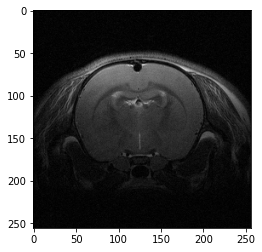

CorrectedImage


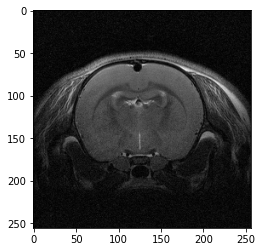

In [30]:
from utils.load_data import get_itk_array
import matplotlib.pyplot as plt

raw = get_itk_array('/content/BEN/cross_domain/rat/src/42d_cas_40_T2.nii.gz')
print('Raw MRI')
plt.imshow(raw[25] ,cmap='gray');plt.show()

correctedImage = get_itk_array('/content/BEN/cross_domain/rat/correctedImage.nii.gz')
print('CorrectedImage')
plt.imshow(correctedImage[25] ,cmap='gray');plt.show()

## 2.2 Using BEN with ANTs in Nipype

In [31]:
from nipype.interfaces.ants import N4BiasFieldCorrection
correct = N4BiasFieldCorrection()
correct.inputs.input_image = '/content/BEN/cross_domain/rat/src/42d_cas_40_T2.nii.gz'
correct.inputs.output_image = '/content/BEN/cross_domain/rat/correctedImage_nipype.nii.gz'
correct.inputs.dimension = 3
done = correct.run()

done.outputs.output_image

''' Feel free to run BEN here or before N4 '''
# from BEN_infer import BEN_inference
# BEN_inference(correctedImage.nii.gz, test.nii.gz, path/to/weight)

'/content/BEN/cross_domain/rat/correctedImage_nipype.nii.gz'

## 2.2.1 Plot

Raw MRI


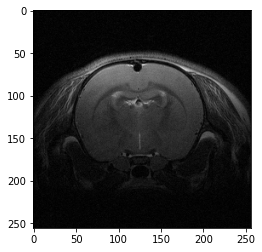

CorrectedImage_nipype


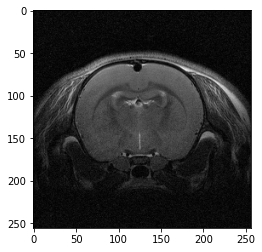

In [33]:
raw = get_itk_array('/content/BEN/cross_domain/rat/src/42d_cas_40_T2.nii.gz')
print('Raw MRI')
plt.imshow(raw[25] ,cmap='gray');plt.show()

correctedImage = get_itk_array('/content/BEN/cross_domain/rat/correctedImage_nipype.nii.gz')
print('CorrectedImage_nipype')
plt.imshow(correctedImage[25] ,cmap='gray');plt.show()